In [1]:
import os

import numpy as np
import pandas as pd

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0326(a)(embedded_square_noisy_512).tif")
img = np.asarray(img)

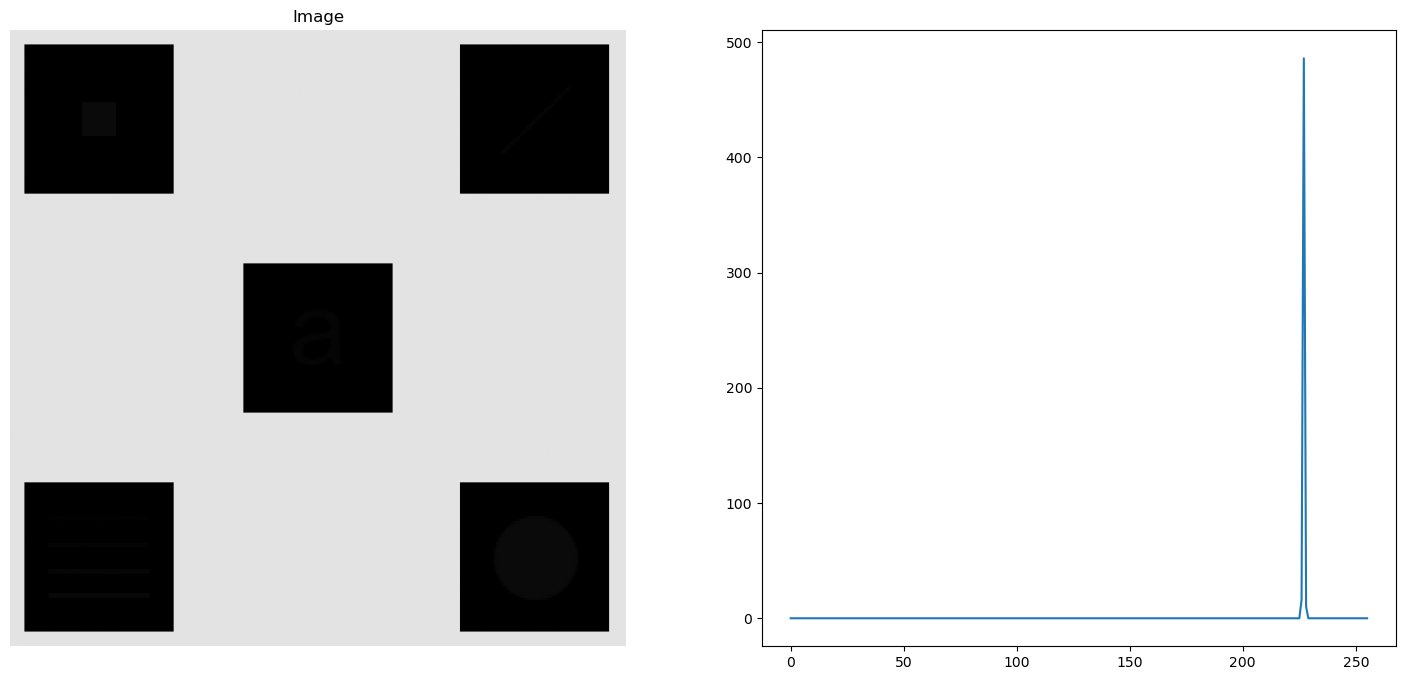

In [3]:
img_hist = cv2.calcHist(img, [0], None, [256], [0, 256])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))
ax1.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax1.set_title("Image")
ax1.axis('off')

ax2.plot(img_hist);

# Global

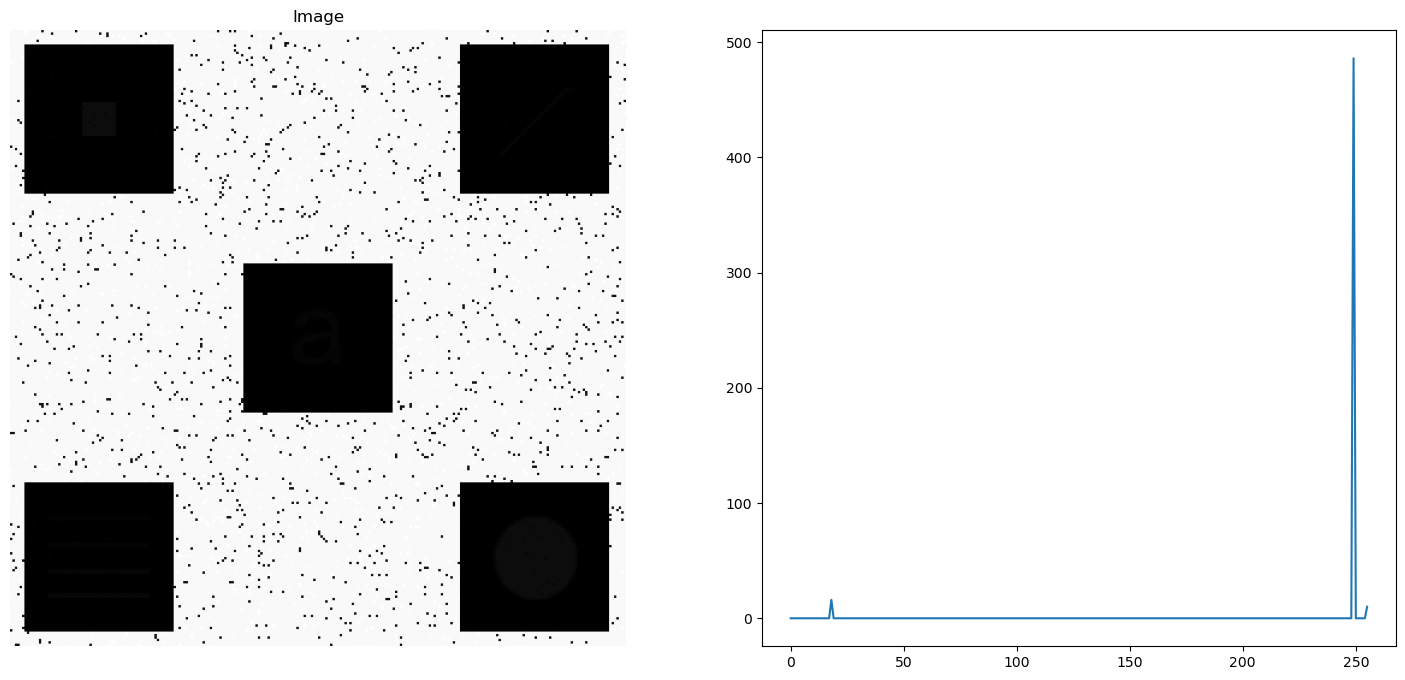

In [4]:
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0326(a)(embedded_square_noisy_512).tif")
img = np.asarray(img)

eq_img = cv2.equalizeHist(img)
img_hist = cv2.calcHist(eq_img, [0], None, [256], [0, 256])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))
ax1.imshow(eq_img, cmap = 'gray', vmin = 0, vmax = 255)
ax1.set_title("Image")
ax1.axis('off')

ax2.plot(img_hist);

# Local

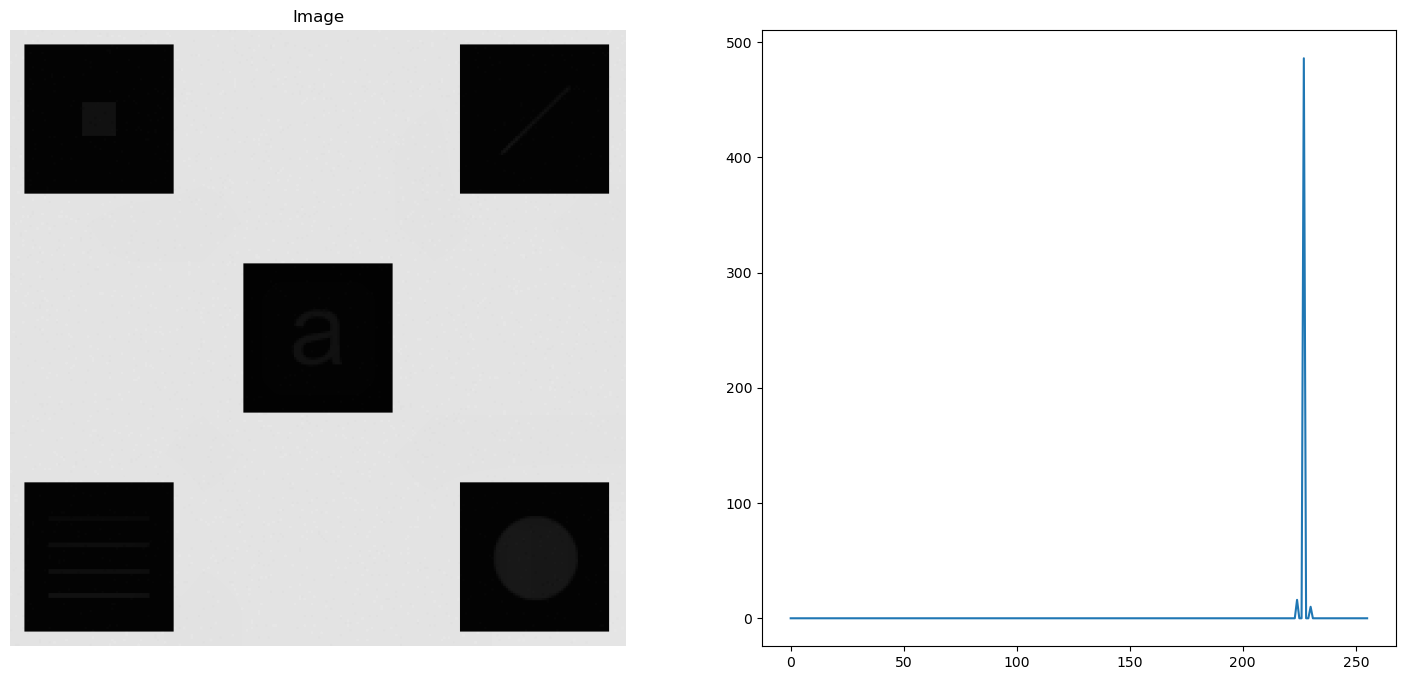

In [5]:
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0326(a)(embedded_square_noisy_512).tif")
img = np.asarray(img)

clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8, 8))
eq_img = clahe.apply(img)
img_hist = cv2.calcHist(eq_img, [0], None, [256], [0, 256])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))
ax1.imshow(eq_img, cmap = 'gray', vmin = 0, vmax = 255)
ax1.set_title("Image")
ax1.axis('off')

ax2.plot(img_hist);

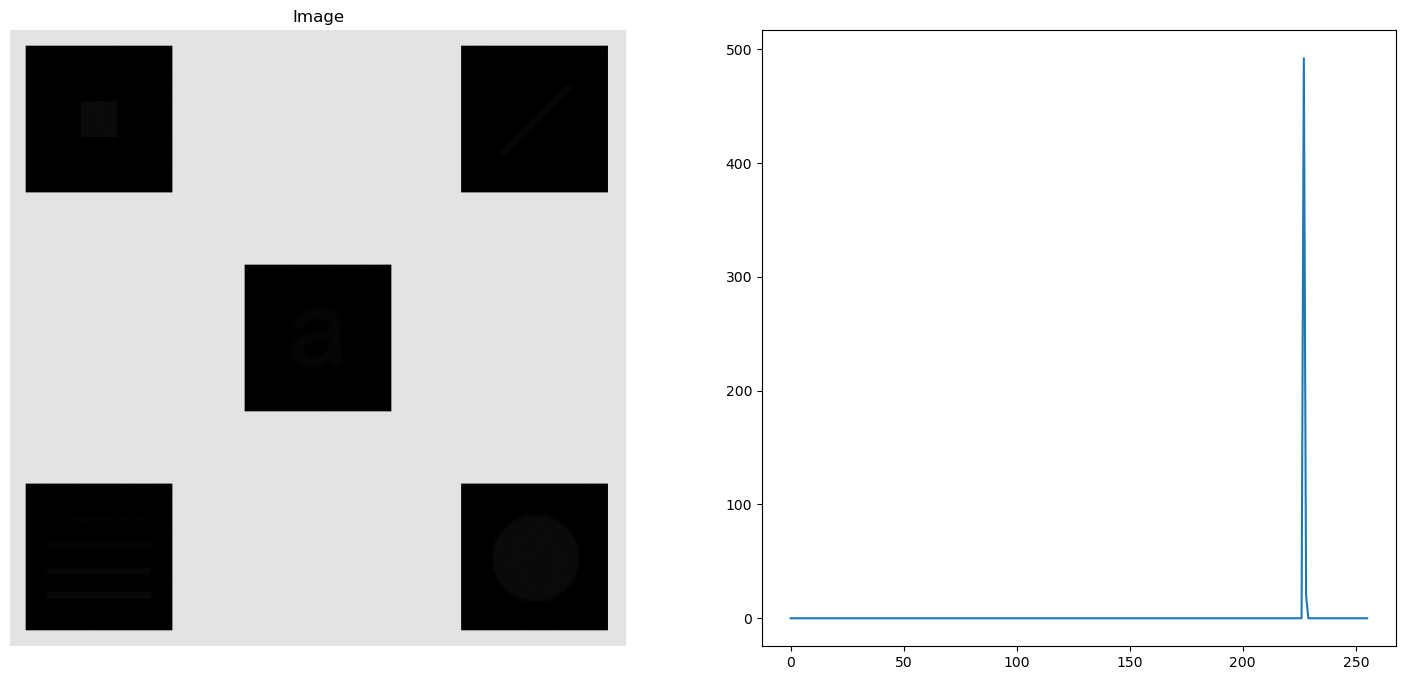

In [6]:
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0326(a)(embedded_square_noisy_512).tif")
img = np.asarray(img)

kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(img, kernel, iterations = 1)
img_hist = cv2.calcHist(dilated_image, [0], None, [256], [0, 256])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))
ax1.imshow(dilated_image, cmap = 'gray', vmin = 0, vmax = 255)
ax1.set_title("Image")
ax1.axis('off')

ax2.plot(img_hist);

In [7]:
def imhist(img):
    row, col = img.shape
    h = [0] * 256

    for i in range(row):
        for j in range(col):
            h[img[i, j]] += 1
    
    return np.array(h)/(row*col)

def cumsum(h):
    return [sum(h[:i+1]) for i in range(len(h))]

def hist_eq(img):
    h = imhist(img)
    cdf = np.array(cumsum(h)) 
    sk = np.uint8(255 * cdf)
    s1, s2 = img.shape
    Y = np.zeros_like(img)
    
    for i in range(s1):
        for j in range(s2):
            Y[i, j] = sk[img[i, j]]
            
    H = imhist(Y)
    return Y, h, H, sk

In [9]:
def local_hist_eq(img, mask_size):
    height, width = img.shape
    enhanced_image = np.zeros((height, width), dtype = np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            neighborhood = img[i - 1: i + mask_size, j - 1: j + mask_size]
            hist = np.histogram(neighborhood, bins = np.arange(256))[0]
            cdf = hist.cumsum()

            enhanced_pixel = cdf[neighborhood[1, 1]] * 255 / cdf[-1]
            enhanced_image[i, j] = enhanced_pixel
    return enhanced_image

img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0326(a)(embedded_square_noisy_512).tif")
img = np.asarray(img)

enhanced_image = local_hist_eq(img, 3)

img[0:5, 0: 5]
img[0:5, 3: 8]
img[3:8, 0: 5]
img[3:8, 3: 8]


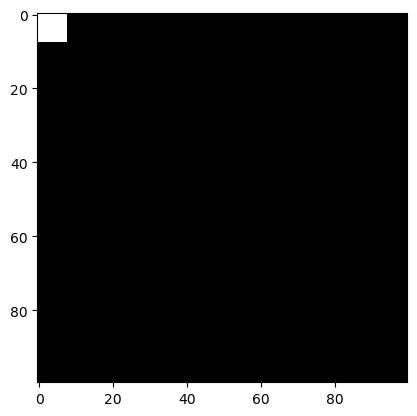

In [10]:
stride = 3
mask_size = 3
mask_size -= 1
height, width = (100, 100)
temp = np.zeros((height, width))

for i in range(stride, (height - 1)//10, stride):
      for j in range(stride, (width - 1)//10, stride):
          temp[i - stride: i + mask_size, j - stride: j + mask_size] = 1
          print(f"img[{i - stride}:{i + mask_size}, {j - stride}: {j + mask_size}]")
plt.imshow(temp, cmap = 'gray')

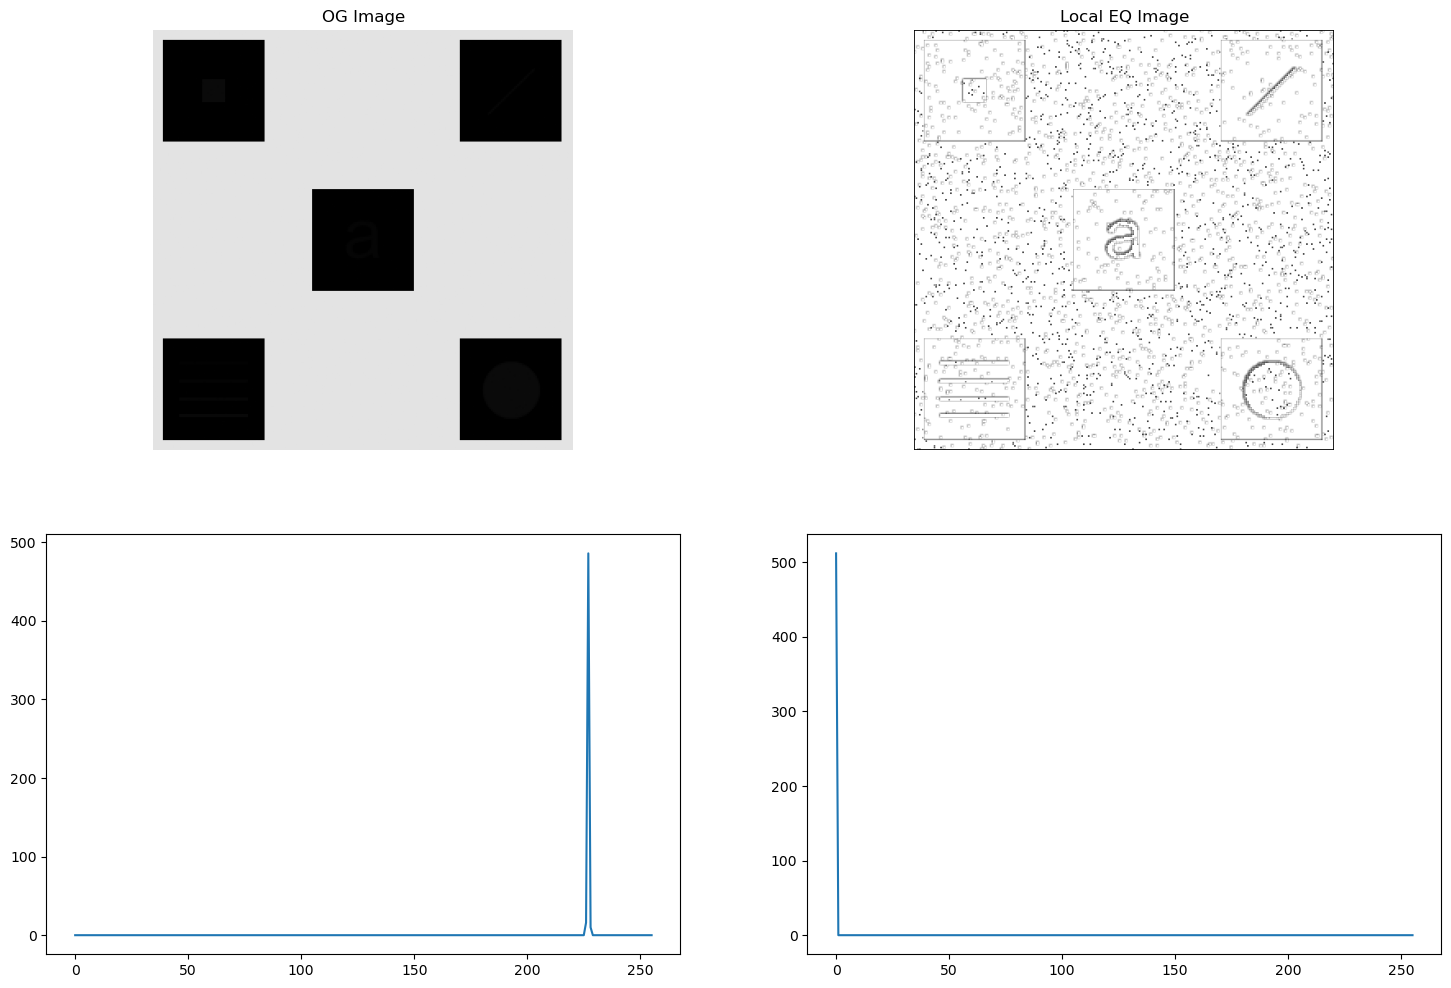

In [11]:
img_hist = cv2.calcHist(img, [0], None, [256], [0, 256])
img_hist_eq = cv2.calcHist(enhanced_image, [0], None, [256], [0, 256])

fig, ((ax1, ax2), 
      (ax3, ax4)) = plt.subplots(2, 2, figsize = (18, 12))
ax1.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax1.set_title("OG Image")
ax1.axis('off')

ax2.imshow(enhanced_image, cmap = 'gray', vmin = 0, vmax = 255)
ax2.set_title("Local EQ Image")
ax2.axis('off')

ax3.plot(img_hist);
ax4.plot(img_hist_eq);